In [ ]:
pip install pandas_ods_reader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49002 sha256=e072aae15beb3df799868e87d6d21db07d9c830b75db96b8a5ff9769e776512c
  Stored in directory: /root/.cache/pip/wheels/d0/0e/c2/1af349f0c9e110ed08133a3d579f402f3ec1c031eac80bc084
Successfully built ezodf


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, GRU
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import optimizers
from tensorflow.python.keras import layers
import tensorflow as tf
from pandas_ods_reader import read_ods

In [ ]:
from numpy.random import seed
seed(1)
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [ ]:
import io
#df = pd.read_csv(io.BytesIO(uploaded['emotions.csv']))
df = read_ods("hi_3500.ods" , 1 )


In [ ]:
df.head()

,sentiment,Label
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative


In [ ]:
df.shape

(9077, 2)

In [ ]:
df["sentiment"].value_counts()

ससुर ने किया बलात्कार ISLAMIC LAW-NOW WIFE IS MOTHER इस्लामिक क़ानून-अब बीवी को माँ मानो                                                        8
जम्मू-कश्मीर बाढ़ : PM ने लिया हालात का जायजा 1000 करोड़ रुपए की दी आर्थिक सहायता - Zee News हिन्दी                                             7
जलवा खतम हो रहा है ये सिर्फ मरे हुवों की मदद करते हैं मर कर एक लाख पाओ . ख़ुदकुशी आत्महत्या को भी कानूनी                                        7
मैं अपने पैरंट्स पर बोझ नहीं डालना चाहता था।                                                                                                    5
किसी अनहोनी की आशंका से करीब आधे घंटे तक क्षेत्र के लोग भयभीत होते रहे।                                                                         4
                                                                                                                                               ..
RT @aajtak: बुराड़ी कांड में बड़ा खुलासा\n@AajGothi\nhttps://t.co/Q8OdMpcng0                                                

In [ ]:
y = df["Label"]
X = df.drop(["Label"], axis = 1)

In [ ]:
# 70/15/15 train/test/val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

X_train.head()

,sentiment
2579,दिल्ली मौजपुर इलाके में एक 2 साल की बच्ची की न...
8763,इस अनोखे पुल का उद्घाटन करने वाले हैं पीएम मोद...
6698,टीम इंडिया के कप्तान महेन्द्र सिंह धोनी के वोट...
5398,विक्की ने जो कुछ किया इसकी उसे बहुत खुशी थी।
8649,RT @aajtak: #HallaBol\nक्या पाटीदार आंदोलन के ...


In [ ]:
tk = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n')


tk.fit_on_texts(X['sentiment'])

# + 1 for unknown token
vocab_size = len(tk.word_index) +1

X_train_seq = tk.texts_to_sequences(X_train['sentiment'])
X_test_seq = tk.texts_to_sequences(X_test['sentiment'])
X_val_seq = tk.texts_to_sequences(X_val['sentiment'])
# Initializing max length of sentence to 20 words
max_length = 20

In [ ]:
tk.word_index

In [ ]:
print(vocab_size)


21575


In [ ]:
X_train_seq

In [ ]:
#padding the sequences to make all the input sequences of the same length

X_train_seq_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=max_length,padding='post')
X_val_seq_pad = pad_sequences(X_val_seq, maxlen=max_length,padding='post')


In [ ]:

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_val_le = le.transform(y_val)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)
y_val_oh = to_categorical(y_val_le)

In [ ]:
X_train_seq_pad

array([[   29,  3558,   156, ...,   689,   299,   189],
       [   20, 21018,  1757, ...,     0,     0,     0],
       [   78,   276,     1, ...,     0,     0,     0],
       ...,
       [10816, 10817,  3302, ...,     0,     0,     0],
       [  607,    18,    21, ...,     5,     6,   741],
       [   70,  1728,  1232, ...,   368,     2,  6505]], dtype=int32)

In [ ]:
emb_dims = 256

model = Sequential()
model.add(Embedding(vocab_size, emb_dims, input_length=max_length, embeddings_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(LSTM(units = 16, dropout = 0.2,recurrent_dropout = 0.2))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_seq_pad, y_train_oh, epochs = 128, batch_size = 256, validation_data=(X_val_seq_pad, y_val_oh), shuffle=False)

Epoch 1/128
26/26 [==============================] - 15s 232ms/step - loss: 1.2969 - accuracy: 0.4982 - val_loss: 1.0642 - val_accuracy: 0.5449
Epoch 2/128
26/26 [==============================] - 3s 122ms/step - loss: 0.9408 - accuracy: 0.6061 - val_loss: 0.8303 - val_accuracy: 0.6105
Epoch 3/128
26/26 [==============================] - 3s 120ms/step - loss: 0.7355 - accuracy: 0.6652 - val_loss: 0.7537 - val_accuracy: 0.6623
Epoch 4/128
26/26 [==============================] - 3s 123ms/step - loss: 0.5983 - accuracy: 0.7624 - val_loss: 0.6417 - val_accuracy: 0.7401
Epoch 5/128
26/26 [==============================] - 4s 166ms/step - loss: 0.3890 - accuracy: 0.8937 - val_loss: 0.6109 - val_accuracy: 0.7832
Epoch 6/128
26/26 [==============================] - 3s 120ms/step - loss: 0.2672 - accuracy: 0.9422 - val_loss: 0.6881 - val_accuracy: 0.7582
Epoch 7/128
26/26 [==============================] - 3s 118ms/step - loss: 0.2428 - accuracy: 0.9489 - val_loss: 0.6493 - val_accuracy: 0.782

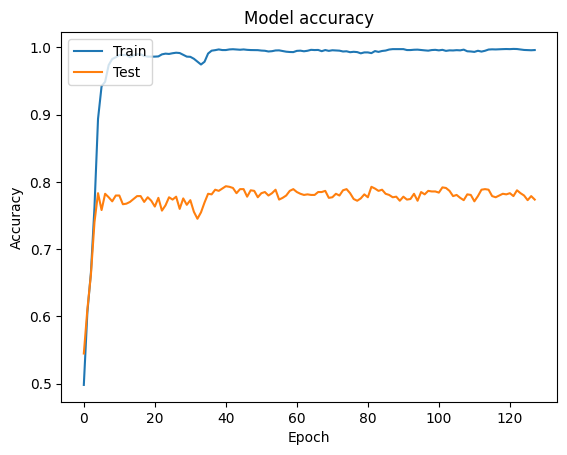

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 256)           5523200   
_________________________________________________________________
lstm (LSTM)                  (None, 16)                17472     
_________________________________________________________________
dense (Dense)                (None, 3)                 51        
Total params: 5,540,723
Trainable params: 5,540,723
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.evaluate(X_test_seq_pad, y_test_oh)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

43/43 [==============================] - 0s 9ms/step - loss: 1.2971 - accuracy: 0.7893
/n
Test accuracy of word embeddings model: 78.93%


In [ ]:
results = model.evaluate(X_val_seq_pad, y_val_oh)
print('/n')
print('Validation accuracy of word embeddings model: {0:.2f}%'.format(results[1]*100))

37/37 [==============================] - 0s 10ms/step - loss: 1.3491 - accuracy: 0.7737
/n
Validation accuracy of word embeddings model: 77.37%


In [ ]:
df2=pd.DataFrame({'sentiment':['कश्मीर में हो रहा है जल जिहाद ।']})

In [ ]:
x=["कश्मीर में हो रहा है जल जिहाद ।"]
print(x)
y=tk.texts_to_sequences(x)
print(y)
y = pad_sequences(y, maxlen=max_length, padding='post')
print(y)

['कश्मीर में हो रहा है जल जिहाद ।']
[[166, 2, 24, 36, 4, 542, 1591, 119]]
[[ 166    2   24   36    4  542 1591  119    0    0    0    0    0    0
     0    0    0    0    0    0]]


In [ ]:
z=model.predict(y)
prob=np.array(z[0])
pred=prob.argmax()
if(pred==0):
  print("negative")
elif(pred==1):
  print("positive")
elif(pred==2):
  print("neutral")

negative


In [ ]:
df=pd.read_csv('test.csv')
df=df.dropna()
df

,source,target,sentence
0,tom,marty,GST is victory of honesty: PM\nअगर ये सहीं है ...
1,manny,marty,क़सम से युपीए 3 आई तो मै भी कांग्रेसी बन जांऊग...
2,tom,manny,मुसलमान ISIS जैसे आतंकी संगठन को भी बडे गर्व स...
3,tom,manny,"RT @aajtak: #MOJO 3 तलाक का दर्द, पीड़ितों की ..."
4,marty,tom,RT @Siddhartha_Giri: ╭────╯•╰────╮\n👌❣️👌\n\nया...
5,tom,brady,RT @Siddhartha_Giri: #KXIPvRCB\nटॉस जीता है मै...
6,brady,paul,बेटे की हत्या का डर दिखाकर डॉक्टर से मांगी 1 क...
7,paul,marty,जब तन्हा रातो में मोगैम्बो चिलाता है की मोगैम्...
8,sam,rick,शाम 4:30 बजे और रात 8:30 बजे aajtak पर @yadava...
9,marty,paul,कुछ ऐसे भी हादसे होते है जिंदगी मेंइंसान बच तो...


In [ ]:
weights=[]
sentiment=[]
curr_sent=[]
for index, row in df.iterrows():
  print(row['sentence'])
  curr_sent.append(row['sentence'])
  y=tk.texts_to_sequences(curr_sent)
  print(y)
  y = pad_sequences(y, maxlen=max_length, padding='post')
  print(y)
  z=model.predict(y)
  prob=np.array(z[0])
  pred=prob.argmax()
  print(pred)
  if(pred==0):
    a=-1
    sentiment.append('negative')
  elif(pred==1):
    a=+1
    sentiment.append('positive')
  elif(pred==2):
    a=0
    sentiment.append('neutral')
  weights.append(a)
  curr_sent=[]
df['weight']=weights
df['sentiment']=sentiment

GST is victory of honesty: PM
अगर ये सहीं है तो पेट्रोलियम पदार्थों पर इसको अबिलम्ब लागु कीजिये. ईमानदारी थोड़ा और बढ़ेगी
[[4965, 614, 11201, 510, 11202, 340, 154, 32, 11203, 4, 27, 11204, 11205, 12, 2197, 11206, 11207, 4869, 2738, 520, 13, 3986]]
[[11201   510 11202   340   154    32 11203     4    27 11204 11205    12
   2197 11206 11207  4869  2738   520    13  3986]]
2
क़सम से युपीए 3 आई तो मै भी कांग्रेसी बन जांऊगा साला कब तक ईमानदार बन अपना ही घर जलाऊँगा?
[[9556, 8, 9557, 279, 299, 27, 1594, 19, 3765, 263, 9558, 1900, 562, 46, 792, 263, 174, 25, 143, 9559]]
[[9556    8 9557  279  299   27 1594   19 3765  263 9558 1900  562   46
   792  263  174   25  143 9559]]
0
मुसलमान ISIS जैसे आतंकी संगठन को भी बडे गर्व से ज्वाइन कर रहे है और यहा लोगो को RSS ज्वाइन करने मे भी शर्म आ रही है धिक्कार है
[[973, 1029, 280, 410, 1910, 9, 19, 3193, 1169, 8, 2728, 26, 38, 4, 13, 6214, 834, 9, 1474, 2728, 40, 293, 19, 1734, 132, 37, 4, 6215, 4]]
[[   8 2728   26   38    4   13 6214  834    9 1474 2728

In [ ]:
df

,source,target,sentence,weight,sentiment
0,tom,marty,GST is victory of honesty: PM\nअगर ये सहीं है ...,0,neutral
1,manny,marty,क़सम से युपीए 3 आई तो मै भी कांग्रेसी बन जांऊग...,-1,negative
2,tom,manny,मुसलमान ISIS जैसे आतंकी संगठन को भी बडे गर्व स...,-1,negative
3,tom,manny,"RT @aajtak: #MOJO 3 तलाक का दर्द, पीड़ितों की ...",1,positive
4,marty,tom,RT @Siddhartha_Giri: ╭────╯•╰────╮\n👌❣️👌\n\nया...,0,neutral
5,tom,brady,RT @Siddhartha_Giri: #KXIPvRCB\nटॉस जीता है मै...,0,neutral
6,brady,paul,बेटे की हत्या का डर दिखाकर डॉक्टर से मांगी 1 क...,1,positive
7,paul,marty,जब तन्हा रातो में मोगैम्बो चिलाता है की मोगैम्...,-1,negative
8,sam,rick,शाम 4:30 बजे और रात 8:30 बजे aajtak पर @yadava...,0,neutral
9,marty,paul,कुछ ऐसे भी हादसे होते है जिंदगी मेंइंसान बच तो...,-1,negative


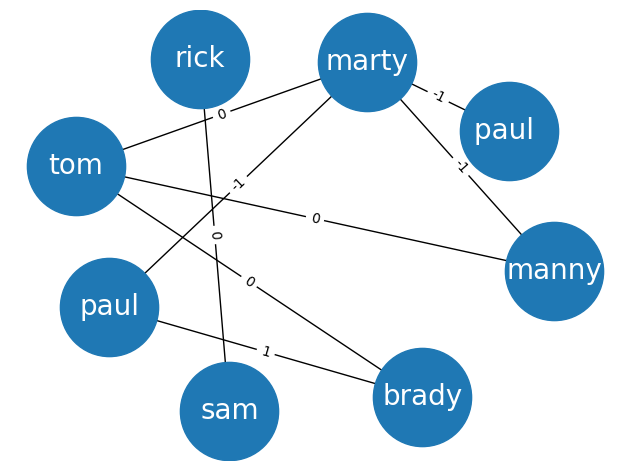

In [ ]:
import networkx as nx
G = nx.Graph()
for index, row in df.iterrows():
    a=row[0]
    b=row['target']
    c=row['weight']
    if ((a,b) in G.edges()):
            data = G.get_edge_data(a,b)
            G.add_edge(a,b, key='edge', weight=data['weight']+c)
            print()
    elif((b,a) in G.edges()):
            data = G.get_edge_data(b,a)
            G.add_edge(a,b, key='edge', weight=data['weight']+c)
    else:
            G.add_edge(a,b, weight=c)
pos = nx.spring_layout(G,seed=7,k=15)
nx.draw_networkx_nodes(G, pos, node_size=5000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif",font_color="white")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
a=np.array([1,2,3])
print(a.dtype)

int64
